## plot loss function

In [2]:
import os
import json
import numpy as np
os.getcwd()
# homedir='/Users/tud500158/Library/Mobile Documents/com~apple~CloudDocs/Documents/Documents - TUD500158/'
homedir='/gpfs/home3/mizeboud/'

In [3]:
# cwd = os.getcwd();
# path_to_vaes = '../../training/'
# sub_dirs = [dirname for dirname in os.listdir(path_to_vaes) if not dirname.startswith('.') ] 
# print(sub_dirs)
# last_dir = sub_dirs[-1]
# model_dirs = [dirname for dirname in os.listdir(os.path.join(path_to_vaes,last_dir)) if not dirname.startswith('.')]
# print(model_dirs)

# path_to_model = os.path.join(path_to_vaes,last_dir,model_dirs[1])
# path_to_model
# print(os.path.join(path_to_vaes,last_dir,model_dirs[1]))

# path2vaes = '/Users/tud500158/Library/Mobile Documents/com~apple~CloudDocs/Documents/Documents - TUD500158/github/AutomatedDamageDetection/training/'
# modeldir = '2022-07/07-11/model_1657553278/'
# modeldir = '2022-07/model_1658152885/'

# modeldir = '2022-10'
# modelnum = 'model_1664883952'
# path_to_model = os.path.join(homedir,'github/AutomatedDamageDetection/training/',modeldir,modelnum)

# on vrlab:
modeldir = '2022-05/2022-05-19'
modelnum = 'model_1652994000'
path_to_model = os.path.join(homedir,'train/',modeldir,modelnum)

print(path_to_model)

/gpfs/home3/mizeboud/train/2022-05/2022-05-19/model_1652994000


#### loaad history

In [14]:
history_files = [file for file in os.listdir(path_to_model) if 'history' in file]
print(history_files)
history_files.sort()
len(history_files)
epoch_nums = range(0,len(history_files))

['history_epoch_12', 'history_epoch_1', 'history_epoch_4', 'history_epoch_3', 'history_epoch_15', 'history_epoch_16', 'history_epoch_7', 'history_epoch_14', 'history_epoch_17', 'history_epoch_13', 'history_epoch_2', 'history_epoch_6', 'history_epoch_10', 'history_epoch_9', 'history_epoch_18', 'history_epoch_11', 'history_epoch_8', 'history_epoch_0', 'history_epoch_5']


range(0, 19)

In [16]:


if len(history_files) > 1:
    loss = []
    val_loss = []
    for epoch_num in range(0,len(history_files)):
        hfile = 'history_epoch_' + str(epoch_num)
    # for hfile in history_files:
        with open(os.path.join(path_to_model,hfile)) as hf:
            data = hf.read()
            data = json.loads(data)
            loss.append(data['loss']['0'])
            val_loss.append(data['val_loss']['0'])
            del data 
    # print(loss)
else:
    hfile=history_files[0]
    with open(os.path.join(path_to_model,hfile)) as hf:
        data = hf.read()
        data = json.loads(data)
        loss = np.array(list(data['loss'].values()))
        val_loss = np.array(list(data['val_loss'].values()))

# print(data)
print(loss)


[79.9604110718, 79.3273391724, 79.2901229858, 79.2746200562, 79.2614593506, 79.2526321411, 79.2548828125, 79.232749939, 79.2336196899, 79.2146224976, 79.2340927124, 79.2391357422, 79.2328414917, 79.2230377197, 79.2273025513, 79.2402038574, 79.2330093384, 79.2246856689, 79.2210159302]
[79.9604110718, 79.3273391724, 79.2901229858, 79.2746200562, 79.2614593506, 79.2526321411, 79.2548828125, 79.232749939, 79.2336196899, 79.2146224976, 79.2340927124, 79.2391357422, 79.2328414917, 79.2230377197, 79.2273025513, 79.2402038574, 79.2330093384, 79.2246856689, 79.2210159302]


In [5]:
print(list(data['loss'].values()))

train_loss = np.array( list(data['loss'].values()) )
train_loss.shape
train_loss


[79.2526321411]


array([79.25263214])

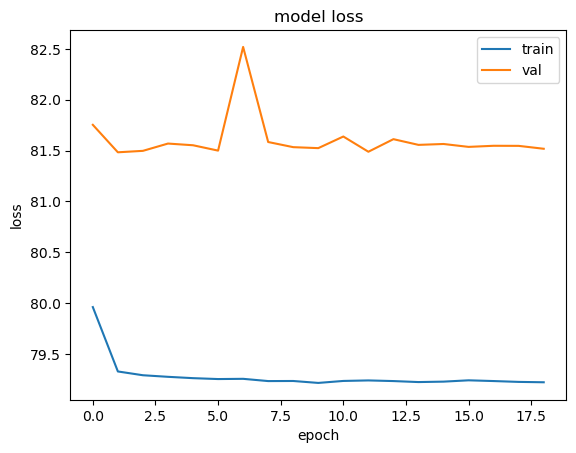

In [17]:
import matplotlib.pyplot as plt
''' ----------
Save model loss figure
------------'''


# summarize history for loss
fig, ax = plt.subplots()
ax.plot(loss)
ax.plot(val_loss)
ax.set_title('model loss')
ax.set_ylabel('loss')
ax.set_xlabel('epoch')
ax.legend(['train', 'val'], loc='upper right')

# fig.savefig(os.path.join(path_to_model  , 'model_loss' ) )

In [51]:
# # get traininig tileNums
# with open(os.path.join(path_to_model,'datasets_1657553278.json')) as hf:
#     data = hf.read()
#     data = json.loads(data)
    
# tile_nums = [int(file.split('/')[-1].split('.')[0].split('_')[-1]) for file in data['training']]
# print(tile_nums)
# int(data['training'][0].split('/')[-1].split('.')[0].split('_')[-1])


## load model and get loss components

In [54]:

import tensorflow as tf

model = tf.keras.models.load_model(os.path.join(path_to_model, 'model_epoch_1') )

2022-07-18 13:50:49.152322: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [56]:
print(model.losses) 

[<tf.Tensor 'Placeholder:0' shape=() dtype=float32>]
